# Visualisation: Chart formatting

By changing settings on the `matplotlib` `Axis` object, or providing arguments to the `pandas` plotting methods, we can can adjust the formatting of plots.

We'll use the same dataset used previously in this course.

In [1]:
# Importing Python packages we are likely to need
import pandas as pd  # data tables
import numpy as np  # numerical operations
import matplotlib.pyplot as plt  # plotting

In [2]:
aggregation_output_path = "~/Downloads/referrals_by_priority.csv"
# df = pd.read_csv("~/cf/coding_club/python_club/outputs/data/referrals_by_priority.csv")
df = pd.read_csv(aggregation_output_path)
df['week_start'] = pd.to_datetime(df['week_start'])
df = df.set_index('week_start')
df.head(3)

,2 Week Wait,Routine,Urgent
week_start,,,
2019-10-31,217570,1050288,167886
2019-11-30,215739,1023472,168726
2019-12-31,209806,1009113,164598


### Exercise

Plot line charts of the data on a single axis

---
## Line colours and styles

Matplotlib lets you specify named colours, like 'red' etc., but can use precise colour codes to match CF branding. In programming languages, colours are represented as *hex codes*. Lots of websites help you find the hex codes for colours you are looking for, e.g.

https://www.w3schools.com/colors/colors_picker.asp

You can also choose line styles:

|Linestyle | Description|
------------|-------------
|'-' or 'solid' | solid line|
|'--' or 'dashed' | dashed line|
|'-.' or 'dashdot' | dash-dotted line|
|':' or 'dotted' | dotted line

You can set colours and styles using the `color` and `style` arguments in the `plot` method. You then provide a list where each entry is the value for the data series you are plotting. Note that the order must be the same as the columns in the dataframe.
```python
    ax = df.plot(color=['red', 'blue', 'yellow'], style=['--', ':.', ':'])
```

In [3]:
# Hex codes (taken from the CF website HTML)
cf_teal = '#26a5b8'
cf_pink = '#dd0075'
cf_orange = "#ff9900"
cf_green = '#61B776'
cf_purple = "#612aa1"
cf_yellow = '#ffcc00'

### Exercise
Replot the referrals data, using CF branding colours and a variety of line styles.

---
## Legend

#### Changing names
Names can be changed with the `Axis.legend` method. The order of the names should be the same as they appear in the legend, which is the same as the order of the dataframe columns.
```python
    ax.legend(["new_name1", "new_name2", "new_name3"])
```
#### Legend position
By default, matplotlib puts the legend in the position with minimal overlap of lines on the plot. But CF style requires legends to be at the top right of the plot. The legend position can be changed with the `loc` argument.
```python
    ax.legend(loc='upper right')
```
#### Legend title
The legend can be given a title with the `title` argument. Sometimes pandas automatically adds a legend title when you don't want one, in which case you can set the title to an empty string.
```python
    ax.legend(title='My legend')
```

### Exercise
A partner asks you to move the legend to the top right of the chart, get rid of the legend title and make the series names more explicit, like "Routine referrals" etc.

---
## Figure sizing

There are two ways to control the size/shape of your figure.

We can adjust the size of the plot using the `figsize` argument in the `plot` method call, which accepts a list comprising integers representing the width and height for the figure in inches.
```python
    ax = df.plot(figsize=[12, 3])
```
Alternatively, you can adjust the extent of the axes. The `set_xlim` and `set_ylim` methods on `Axis` let you control the points where the axis starts and stops.
```python
    ax.set_ylim([0, 2000000])
```

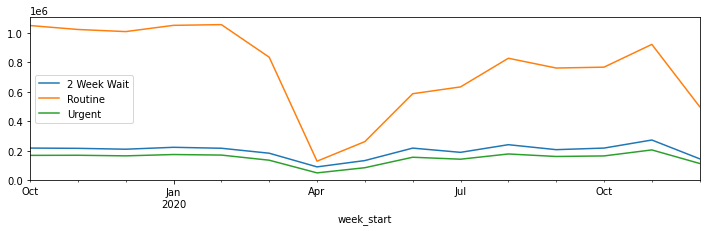

In [4]:
ax = df.plot(figsize=[12, 3])

(597.0, 617.0)

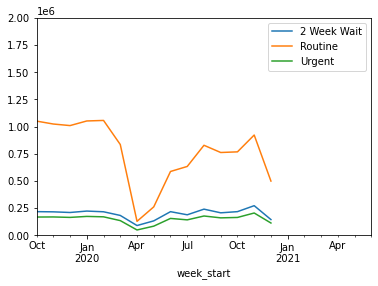

In [5]:
ax = df.plot()
two_million = 2 * 10**6
ax.set_ylim([0, two_million])
ax.set_xlim(['2019-10-01', '2021-06-01'])  # wider date range than the data include

---
## Labels

You can set exact values for the points along each axis that are marked by ticks and annotated with tick labels.
```python
    ax.set_yticks([0, 10, 20])
```
And you can set the tick labels with exact values, which match the number of ticks:
```python
    ax.set_yticklabels(['Zero', 'Ten', 'Twenty'])
```

### Exercise
A partner asks you to change the y axis of your plot to rounded millions, i.e. labelled with "0", "0.5m" and "1m".

Hint: 1m is $10^6$, which in python is represented as `10**6`.

You can set labels for the axes and the chart title with the following methods. Set them to an empy string if you just want to get rid of them.

```python
ax.set_xlabel('my x label')
ax.set_ylabel('my y label')
ax.set_title("my chart title")
```

### Exercise
Change the labels and title to something sensible.

---
## Fonts

Fonts can't be changed by changing settings on `Axis` objects directly. Instead we can update the settings matplotlib itself.

The matplotlib default font (DejaVu Sans) is sufficiently similar to CF's house style font (Calibri) that you probably won't need to change it. It may be useful to change the size though.

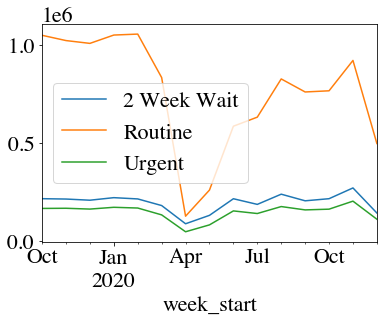

In [6]:
plt.rcParams.update({'font.size': 22, 'font.family': 'Times'})
ax = df.plot()

Remember this is a global setting, so will affect other plots in the notebook. Let's change the fonts back to defaults.

In [7]:
plt.rcParams.update({'font.size': 12, 'font.family': 'DejaVu Sans'})

### The grand challenge

Combine all you've learned in this notebook to make a beautiful chart from the aggregated referrals data.

* Use CF colours
* Use a different line style for each data series
* Set the chart size to be twice as wide as it is tall
* Set the y ticks to be in millions
* Add a legend without its own title and with renamed series names
* Hide the x axis label
* Any other nice changes you'd like to make - be creative!